# Social distancing in airplane seat assignments(2020)

<div style="float: right">Salari et al.</div>

<div style="float: right">Coded by JunPyo Park</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#그림-그리기-준비" data-toc-modified-id="그림-그리기-준비-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>그림 그리기 준비</a></span><ul class="toc-item"><li><span><a href="#좌석-배치를-좌표계로-옮기기" data-toc-modified-id="좌석-배치를-좌표계로-옮기기-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>좌석 배치를 좌표계로 옮기기</a></span></li></ul></li><li><span><a href="#Beta-계산" data-toc-modified-id="Beta-계산-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Beta 계산</a></span></li><li><span><a href="#parameter-setting" data-toc-modified-id="parameter-setting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>parameter setting</a></span><ul class="toc-item"><li><span><a href="#$\lambda_\gamma$-:-row-배치에-영향을-주는-파라미터" data-toc-modified-id="$\lambda_\gamma$-:-row-배치에-영향을-주는-파라미터-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>$\lambda_\gamma$ : row 배치에 영향을 주는 파라미터</a></span></li><li><span><a href="#other_parameters" data-toc-modified-id="other_parameters-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>other_parameters</a></span></li></ul></li><li><span><a href="#GUROBI-Solver" data-toc-modified-id="GUROBI-Solver-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>GUROBI Solver</a></span><ul class="toc-item"><li><span><a href="#Model-1.-$Z=min(w_1-Z_1-+-w_2-Z_2)$" data-toc-modified-id="Model-1.-$Z=min(w_1-Z_1-+-w_2-Z_2)$-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Model 1. $Z=min(w_1 Z_1 + w_2 Z_2)$</a></span><ul class="toc-item"><li><span><a href="#Variables" data-toc-modified-id="Variables-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Variables</a></span></li><li><span><a href="#Constraint-1.-Occupancy-constraint-(Eq.-(6))" data-toc-modified-id="Constraint-1.-Occupancy-constraint-(Eq.-(6))-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Constraint 1. Occupancy constraint (Eq. (6))</a></span></li><li><span><a href="#Constraint-2-(Eq.-(7))" data-toc-modified-id="Constraint-2-(Eq.-(7))-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Constraint 2 (Eq. (7))</a></span></li><li><span><a href="#objective-z_1-(Eq.-(4))" data-toc-modified-id="objective-z_1-(Eq.-(4))-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>objective z_1 (Eq. (4))</a></span></li><li><span><a href="#objective-z_2-(Eq.-(5))" data-toc-modified-id="objective-z_2-(Eq.-(5))-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>objective z_2 (Eq. (5))</a></span></li><li><span><a href="#Final-Objective-(Eq.(3))" data-toc-modified-id="Final-Objective-(Eq.(3))-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Final Objective (Eq.(3))</a></span></li><li><span><a href="#Optimize-Model-1" data-toc-modified-id="Optimize-Model-1-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Optimize Model 1</a></span></li></ul></li><li><span><a href="#Model-2.-Maximizing-the-(safe)-load-of-passengers" data-toc-modified-id="Model-2.-Maximizing-the-(safe)-load-of-passengers-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Model 2. Maximizing the (safe) load of passengers</a></span><ul class="toc-item"><li><span><a href="#Setting-the-parameter-$\eta_Z$" data-toc-modified-id="Setting-the-parameter-$\eta_Z$-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Setting the parameter $\eta_Z$</a></span></li><li><span><a href="#Variables" data-toc-modified-id="Variables-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Variables</a></span></li><li><span><a href="#Constraints-1-(Eq.-(9))" data-toc-modified-id="Constraints-1-(Eq.-(9))-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Constraints 1 (Eq. (9))</a></span></li><li><span><a href="#Constraints-2-(Eq.-(10))" data-toc-modified-id="Constraints-2-(Eq.-(10))-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Constraints 2 (Eq. (10))</a></span></li><li><span><a href="#Constraints-3-(Eq.-(7))" data-toc-modified-id="Constraints-3-(Eq.-(7))-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Constraints 3 (Eq. (7))</a></span></li><li><span><a href="#Objective-(Eq.-(8))" data-toc-modified-id="Objective-(Eq.-(8))-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span>Objective (Eq. (8))</a></span></li><li><span><a href="#Optimize-Model-2" data-toc-modified-id="Optimize-Model-2-4.2.7"><span class="toc-item-num">4.2.7&nbsp;&nbsp;</span>Optimize Model 2</a></span></li></ul></li></ul></li></ul></div>

In [1]:
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 그림 그리기 준비

In [2]:
class color_scheme():
    def __init__(self):
        self.black = (0,0,0)
        self.white = (255,255,255)
        self.safe = (164,195,144)
        self.danger = (253, 32, 28)
        self.soso = (251, 248,16)

def get_random_color():
    rand_num = int(np.random.random() * 4 + 1 - 1e-10)
    if rand_num == 1:
        return color.safe
    elif rand_num == 2:
        return color.white
    elif rand_num == 3:
        return color.soso
    elif rand_num == 4:
        return color.danger

In [3]:
color = color_scheme()
map_size = np.array([127, 640])
map_multiple = 1

im = Image.new('RGB', tuple(map_size*map_multiple), color.white)
draw = ImageDraw.Draw(im)

In [4]:
rows = range(20) # row
sides = range(2) # side (left, right)
locations = range(3) # seat location (window, middle, aisle)

In [5]:
seat_loc = np.zeros((20,2,3,2))
x=0
y=0
seat_width = 17.5
seat_pitch = 32
seat_height = 28
aisle_width = 22

In [6]:
def draw_seat(variable_x):
    count = 0
    for r in rows: 
        for s in sides: 
            for l in locations: 
                if variable_x[(r,s,l)].X > 0.9: # 소수점으로 나오는거 고려
                    fill_color = color.soso
                    count+=1
                else:
                    fill_color = color.white

                x = seat_loc[r][s][l][0] - seat_width/2
                y = seat_loc[r][s][l][1] - seat_height/2 
                draw.rectangle((x, y, x+seat_width, y+seat_height), fill=fill_color, outline=color.black)

    im.save('airplane.jpg', quality=95)
    numpy_images = np.array(im)
    plt.imshow(numpy_images)
    plt.show()
    print(count, ' passengers here')

### 좌석 배치를 좌표계로 옮기기

**$l$ (location) 의 방향에 주의 해야 함**

* 창 -> 중간 -> 통로 순서이기 때문에 좌석이 1,2,3 |복도| 6,5,4 순으로 생성

In [7]:
for r in rows: 
    for s in sides: 
        for l in locations: 
            random_color = get_random_color()
            draw.rectangle((x, y, x+seat_width, y+seat_height), fill=random_color, outline=color.black)
            
            # save location of center
            seat_loc[r][s][l][0] = x+seat_width/2
            seat_loc[r][s][l][1] = y+seat_height/2 
            
            if s :
                x -= seat_width
            else:
                x += seat_width
        x += aisle_width
        if s == 0:
            x += 2 * seat_width
    x = 0
    y += seat_pitch

In [8]:
seat_loc[0][0][0]

array([ 8.75, 14.  ])

In [9]:
seat_loc[0][0][1]

array([26.25, 14.  ])

In [10]:
seat_loc[0][1][0]

array([118.25,  14.  ])

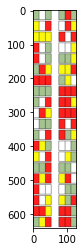

In [11]:
# im.save('data/dst/pillow_imagedraw.jpg', quality=95)
numpy_images = np.array(im)
plt.imshow(numpy_images)
plt.show()

## Beta 계산

In [12]:
def dist(seat_1, seat_2):
    # returns the euclidean distance between two seats
    return np.sqrt(((seat_1-seat_2)**2).sum())

In [13]:
# beta=np.zeros((20,2,3,20,2,3,2)) # r,s,l,rr,ss,ll,k
beta = {}

k 값에 따라 달라지는 Bounds 세팅

In [14]:
bounds = np.array([[1e-10, 39.6],        # 0 ~ 3.3 ft -> 0 ~ 39.6 inches
                   [39.6, 79.2]])    # 3.3 ~ 6.6 ft -> 39.6, ~ 79.2 inches

In [15]:
for r in rows:
    for s in sides: 
        for l in locations:
            seat_1 = seat_loc[r][s][l]
            for rr in rows:
                for ss in sides:
                    for ll in locations:
                        seat_2 = seat_loc[rr][ss][ll]
                        euc_dist = dist(seat_1, seat_2)
                        for k in range(2):
                            lower_bound = bounds[k][0]
                            upper_bound = bounds[k][1]
                            x = (r,s,l,rr,ss,ll,k)
                            if euc_dist > lower_bound and euc_dist <= upper_bound:
                                # beta[r][s][l][rr][ss][ll][k] = 1
                                beta[x] = 1
                            else:
                                # beta[r][s][l][rr][ss][ll][k] = 0
                                beta[x] = 0

In [16]:
beta[(0,0,0,0,0,0,0)] # 자기 자신은 0

0

In [17]:
beta[(0,0,0,0,0,1,0)]

1

In [18]:
beta[(0,0,0,0,0,2,0)]

1

In [19]:
beta[(0,0,0,2,0,0,0)] # k = 0

0

In [20]:
beta[(0,0,0,2,0,0,1)] # k = 1 -> 범위가 늘어나 1로 바뀜

1

## parameter setting

### $\lambda_\gamma$ : row 배치에 영향을 주는 파라미터

In [21]:
def get_lambda(gamma=1):
    lambda_gamma = np.zeros(20)
    for r in range(10):
        lambda_gamma[r] = (1/(1+r)) ** (1/gamma)
        lambda_gamma[20-r-1] = lambda_gamma[r] # symmetric
    return lambda_gamma

In [22]:
get_lambda(gamma=1)

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.1       , 0.11111111, 0.125     , 0.14285714, 0.16666667,
       0.2       , 0.25      , 0.33333333, 0.5       , 1.        ])

In [23]:
get_lambda(gamma=9)

array([1.        , 0.92587471, 0.88508815, 0.85724398, 0.83625103,
       0.81948074, 0.80556431, 0.79370053, 0.78338104, 0.77426368,
       0.77426368, 0.78338104, 0.79370053, 0.80556431, 0.81948074,
       0.83625103, 0.85724398, 0.88508815, 0.92587471, 1.        ])

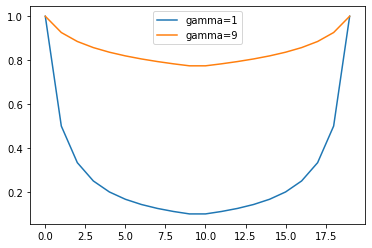

In [24]:
plt.figure()
plt.plot(rows,get_lambda(gamma=1), label='gamma=1')
plt.plot(rows,get_lambda(gamma=9), label='gamma=9')
plt.legend();

$\gamma$가 작을수록 양끝에 배치 하는게 더 큰 페널티를 받음

### other_parameters

아래서 하나 골라서 실행

In [25]:
# Scenario 1, Fig. 4
num_passengers = 30

w_1 = 0.9
w_2 = 0.1

delta = [0.9,0.1] # k에 따른 패널티
alpha = [0,0.4,0.6] # l에 따른 패널티 (창측, 중간, 복도)

lambda_gamma = get_lambda(gamma=1) # r에 따른 패널티
# lambda_gamma = get_lambda(gamma=9)

In [26]:
# Scenario 2, Fig. 4

num_passengers = 30

w_1 = 0.1
w_2 = 0.9

delta = [0.6,0.4]
alpha = [0,0.1,0.9]

lambda_gamma = get_lambda(gamma=1)
# lambda_gamma = get_lambda(gamma=9)

In [68]:
# Scenario 3, Table 5

num_passengers = 60

w_1 = 0.5
w_2 = 0.5

# delta = [0.9,0.1]
delta = [1,0] # 4.2 update
alpha = [0,0.1,0.9]

# lambda_gamma = get_lambda(gamma=1)
lambda_gamma = get_lambda(gamma=9)

In [28]:
# Fig. 6
num_passengers = 60

# Scenario 2
w_1 = 0.1
w_2 = 0.9

delta = [0.6,0.4]
alpha = [0,0.1,0.9]

lambda_gamma = get_lambda(gamma=1)
# lambda_gamma = get_lambda(gamma=9)

In [29]:
# Fig. 8 (a)
num_passengers = 36

# Scenario 2
w_1 = 0.1
w_2 = 0.9

delta = [1,0]
alpha = [0.33,0.33,0.33]

lambda_gamma = get_lambda(gamma=1)
# lambda_gamma = get_lambda(gamma=9)

## GUROBI Solver

### Model 1. $Z=min(w_1 Z_1 + w_2 Z_2)$

In [26]:
import gurobipy as gp
from gurobipy import GRB

In [27]:
combinations, scores = gp.multidict(beta)

In [28]:
m = gp.Model('Model1')

Academic license - for non-commercial use only - expires 2021-07-07
Using license file C:\Users\wnsvy\gurobi.lic


#### Variables

`Z1`,`Z2`, `variable_x`, `variable_y` 생성

In [29]:
Z1=m.addVar(vtype=GRB.CONTINUOUS, name='Z1')
Z2=m.addVar(vtype=GRB.CONTINUOUS, name='Z2')

In [30]:
y_combinations = gp.tuplelist()

In [31]:
for r in rows:
    for s in sides:
        for l in locations:
            for rr in rows:
                for ss in sides:
                    for ll in locations:
                        y_combinations.append((r,s,l,rr,ss,ll))

In [32]:
variable_y = m.addVars(y_combinations, name = 'variable_Y',vtype=GRB.BINARY)

In [33]:
x_combinations = gp.tuplelist()

In [34]:
for r in rows:
    for s in sides:
        for l in locations:
            x_combinations.append((r,s,l))

In [35]:
variable_x = m.addVars(x_combinations, name='variable_X',vtype=GRB.BINARY)

#### Constraint 1. Occupancy constraint (Eq. (6))

In [78]:
passenger_constr = m.addConstr(variable_x.sum() == num_passengers, name='passenger_constr')

#### Constraint 2 (Eq. (7))

In [79]:
for r in rows:
    for s in sides:
        for l in locations:
            loc_1 = (r,s,l)
            for rr in rows:
                for ss in sides:
                    for ll in locations:
                        loc_2 = (rr,ss,ll)
                        if loc_1 == loc_2:
                            pass
                        else:
                            m.addConstr(variable_x[loc_1] + variable_x[loc_2] - 1 <= variable_y[(loc_1+loc_2)])

```python
m.addConstrs((variable_x[(r,s,l)] + variable_x[(rr,ss,ll)] - 1 <= 
              variable_y[(r,s,l,rr,ss,ll)] 
              for r in rows
              for s in sides
              for l in locations
              for rr in rows
              for ss in sides
              for ll in locations
              if (r,s,l) != (rr,ss,ll)), name='y_constr')
```

둘다 똑같이 나옴

#### objective z_1 (Eq. (4))

In [80]:
z_1 = gp.LinExpr()
for r in rows:
    for s in sides:
        for l in locations:
            loc_1 = (r,s,l)
            for rr in rows:
                for ss in sides:
                    for ll in locations:
                        loc_2 = (rr,ss,ll)
                        loc = loc_1 + loc_2
                        for k in range(2):
                            ### TODO: zero exception
                            z_1 += delta[k] * variable_y[loc] * beta[loc+(k,)]
                        

#### objective z_2 (Eq. (5))

In [81]:
z_2 = gp.LinExpr()

In [82]:
for l in locations:
    for s in sides:
        for r in rows:
            ### TODO: zero exception
            z_2 += alpha[l] * lambda_gamma[r] * variable_x[(r,s,l)]         

#### Final Objective (Eq.(3))

In [83]:
m.setObjective(w_1 * z_1 + w_2 * z_2, GRB.MINIMIZE)

#### Optimize Model 1

In [84]:
m.write('Model1.lp')

In [85]:
m.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 14281 rows, 14520 columns and 42960 nonzeros
Model fingerprint: 0x699c6c9f
Variable types: 0 continuous, 14520 integer (14520 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-02, 5e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Found heuristic solution: objective 94.7483471
Presolve removed 13874 rows and 13994 columns
Presolve time: 0.01s
Presolved: 407 rows, 526 columns, 1338 nonzeros
Variable types: 0 continuous, 526 integer (526 binary)

Root relaxation: objective 8.480848e+00, 156 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    8.48085    0  120   94.74835    8.48085  91.0%     -    0s
H    0     0                      65

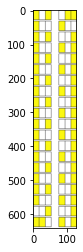

60  passengers here


In [86]:
# 미리 정한 승객수 만큼 최적화
draw_seat(variable_x)

Fig. 4. , Fig. 6. 이랑 같은 세팅이면 그림이 똑같이 나와야 하는데 약간씩 다르게 나오네요....

보여주는 특성은 얼추 맞는거 같기는 한데 흠....

In [107]:
ss = 0
sd = 0
for item in variable_y.items():
    ss += int(item[1].X)
    sd += 1

In [108]:
print (ss, sd)

13580 14400


y에 너무 많은 1이 가는거 같습니다

느낌상 variable_y가 최적화가 덜 되는거 같은데 교수님 찬스 쓰거나 나중에 쫌 더 살펴보겠습니다......

### Model 2. Maximizing the (safe) load of passengers

* Model 1 에서 Model 2 로 넘어가는 부분이 사실 명확히 이해되지는 않는데 교수님이 보내주신 그것도 시간나면 만들어 볼게요

파라미터 에타(Z1), 에타(Z2)의 upper bound

$\text{Upper Bound of } \eta_{Z_1}$

In [89]:
eta_z_1 = 0
for r in rows:
    for s in sides:
        for l in locations:
            loc_1 = (r,s,l)
            for rr in rows:
                for ss in sides:
                    for ll in locations:
                        loc_2 = (rr,ss,ll)
                        loc = loc_1 + loc_2
                        for k in range(2):
                            ### TODO: zero exception
                            eta_z_1 += delta[k] * variable_y[loc].X * beta[loc+(k,)]
                        

In [90]:
eta_z_1

112.0

$\text{Upper Bound of } \eta_{Z_2}$

In [91]:
eta_z_2 = 0
for l in locations:
    for s in sides:
        for r in rows:
            ### TODO: zero exception
            eta_z_2 += alpha[l] * lambda_gamma[r] * variable_x[(r,s,l)].X
            

In [92]:
eta_z_2

15.465526712572894

---

#### Setting the parameter $\eta_Z$

In [93]:
# Example
eta_z_1 = 20
eta_z_2 = 5

In [94]:
m2 = gp.Model('Model2')

#### Variables

In [95]:
m2_variable_x = m2.addVars(x_combinations, name='variable_X',vtype=GRB.BINARY)

In [96]:
m2_variable_y = m2.addVars(y_combinations, name='variable_Y',vtype=GRB.BINARY)

#### Constraints 1 (Eq. (9))

In [97]:
constr_1 = gp.LinExpr()
for r in rows:
    for s in sides:
        for l in locations:
            loc_1 = (r,s,l)
            for rr in rows:
                for ss in sides:
                    for ll in locations:
                        loc_2 = (rr,ss,ll)
                        loc = loc_1 + loc_2
                        for k in range(2):
                            ### TODO: zero exception
                            constr_1 += delta[k] * m2_variable_y[loc] * beta[loc+(k,)]
                        

#### Constraints 2 (Eq. (10))

In [98]:
constr_2 = gp.LinExpr()

In [99]:
for l in locations:
    for s in sides:
        for r in rows:
            ### TODO: zero exception
            constr_2 += alpha[l] * lambda_gamma[r] * m2_variable_x[(r,s,l)]
            

In [100]:
m2.addConstr(constr_1 <= eta_z_1)

<gurobi.Constr *Awaiting Model Update*>

In [101]:
m2.addConstr(constr_2 <= eta_z_2)

<gurobi.Constr *Awaiting Model Update*>

#### Constraints 3 (Eq. (7))

In [102]:
for r in rows:
    for s in sides:
        for l in locations:
            loc_1 = (r,s,l)
            for rr in rows:
                for ss in sides:
                    for ll in locations:
                        loc_2 = (rr,ss,ll)
                        if loc_1 == loc_2:
                            pass
                        else:
                            m2.addConstr(m2_variable_x[loc_1] + m2_variable_x[loc_2] - 1 <= m2_variable_y[(loc_1+loc_2)])

#### Objective (Eq. (8))

In [103]:
m2.setObjective(m2_variable_x.sum(), GRB.MAXIMIZE)

#### Optimize Model 2

In [104]:
m2.write('Model2.lp')

In [105]:
m2.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 14282 rows, 14520 columns and 43732 nonzeros
Model fingerprint: 0x4778b4e3
Variable types: 0 continuous, 14520 integer (14520 binary)
Coefficient statistics:
  Matrix range     [8e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 1.0000000
Found heuristic solution: objective 26.0000000
Presolve removed 13468 rows and 13588 columns
Presolve time: 0.02s
Presolved: 814 rows, 932 columns, 3328 nonzeros
Variable types: 0 continuous, 932 integer (932 binary)

Root relaxation: objective 4.784673e+01, 395 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   47.84673    0  116   26.00000   47.84673  84.0%   

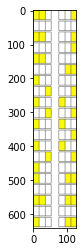

36  passengers here


In [106]:
draw_seat(m2_variable_x)

이게 맞는 건가??